In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

# 1. Analysis of Teams

In [8]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
matches = matches[matches.season >= 2016]
matches = matches[matches['result']=='normal']
matches1 = matches.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)

matches1.dropna(inplace=True)

In [30]:
team_1 = 'Kolkata Knight Riders'
team_2 = 'Royal Challengers Bangalore'

In [31]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [32]:
for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(lambda x: x if x==team_1 else (x if x==team_2 else "Others"))


In [33]:
today_match = pd.concat([matches1[(matches1.team1 == team_1) & (matches1.team2 == team_2)], matches1[(matches1.team1 == team_2) & (matches1.team2 == team_1)]])
today_match.head()

,id,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
26,27,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,82,0
623,624,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,0,9
44,45,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,6
605,606,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,5
638,7896,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,4


## The below plot suggest that whichever team wins the toss, generally will choose balling over batting. 

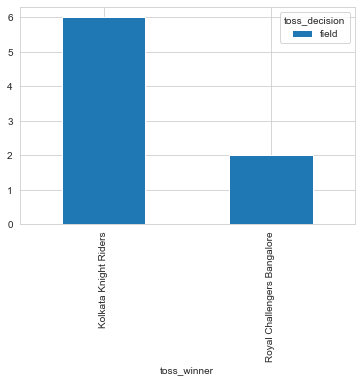

In [34]:
sns.set_style('whitegrid')
pd.crosstab(today_match.toss_winner, today_match.toss_decision).plot(kind='bar')

## The plot below suggests that Delhi Capitals will win the toss

Text(0.5, 1, 'Chances of Winning Toss')

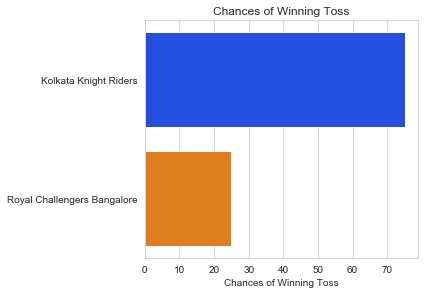

In [35]:
toss_wins = pd.DataFrame(today_match['toss_winner'].value_counts())
toss_wins['Chances of Winning Toss'] = toss_wins['toss_winner']*100/sum(toss_wins['toss_winner'])
sns.barplot(x=toss_wins['Chances of Winning Toss'], y=toss_wins.index, palette='bright')
plt.tight_layout()
plt.title('Chances of Winning Toss')

## The plot below suggests that Mumbai Indians will win the match

Text(0.5, 1.0, 'Percentage of Winning')

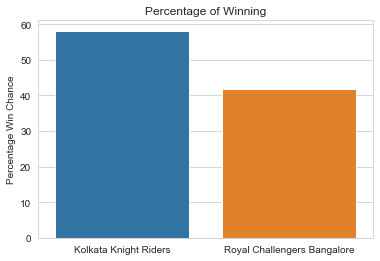

In [36]:
wins = pd.DataFrame(matches1['winner'].value_counts()[1:])
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

# 2. Analysis of Players and Stats

In [56]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [38]:
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

In [62]:
dk = 'KD Karthik'
vk = 'V Kohli'
dk_matches = delivery[(delivery.batting_team==team_1) & (delivery.batsman==rs)]
dk_matches.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
151113,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,8,5,KD Karthik,N Rana,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
151114,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,8,6,KD Karthik,N Rana,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
151115,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,1,KD Karthik,N Rana,K Khejroliya,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
151117,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,3,KD Karthik,N Rana,K Khejroliya,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
151119,7896,2,Kolkata Knight Riders,Royal Challengers Bangalore,9,5,KD Karthik,N Rana,K Khejroliya,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


Text(0.5, 1.0, 'Dinesh Karthik score against all RCB matches')

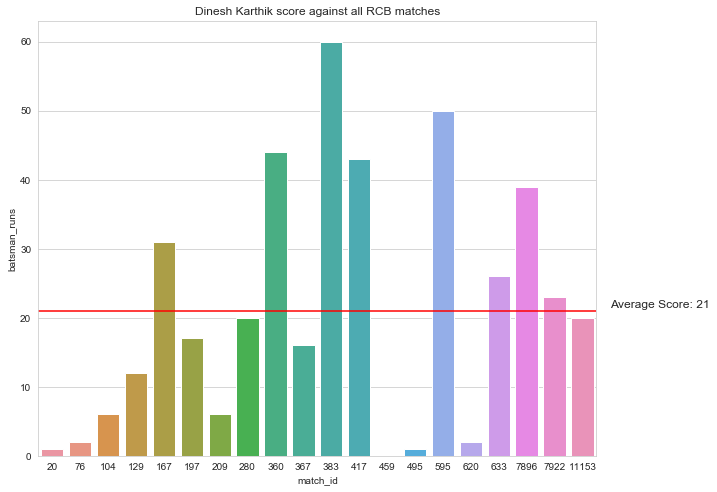

In [67]:
dk_matches1 = delivery[(delivery.batsman==rs)]
dk_vs_rcb1 = dk_matches1[dk_matches1['bowling_team']==team_2].groupby('match_id').sum().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='match_id', y='batsman_runs', data=dk_vs_rcb1)
plt.axhline(y=np.mean(dk_vs_rcb1['batsman_runs']), color='red')
plt.text(x=20, y=np.mean(dk_vs_rcb1['batsman_runs'])+0.5, fontsize=12, s='Average Score: {}'.format(round(np.mean(dk_vs_rcb1['batsman_runs']))))
plt.title('Dinesh Karthik score against all RCB matches')

Text(0.5, 1.0, 'Dinesh Karthik score in KKR against all RCB matches')

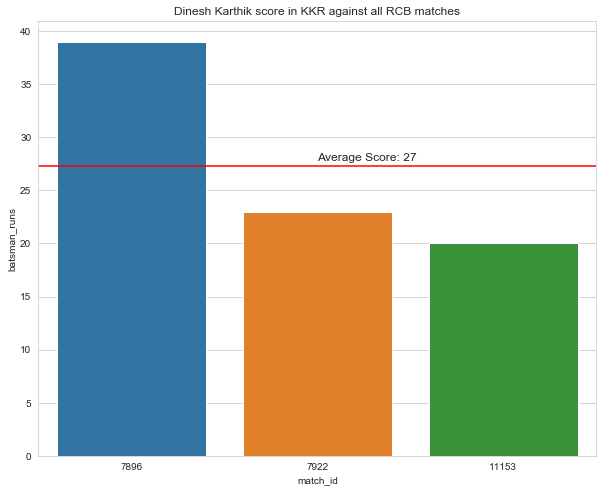

In [65]:
dk_vs_rcb = dk_matches[dk_matches['bowling_team']==team_2].groupby('match_id').sum().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='match_id', y='batsman_runs', data=dk_vs_rcb)
plt.axhline(y=np.mean(dk_vs_rcb['batsman_runs']), color='red')
plt.text(x=1, y=np.mean(dk_vs_rcb['batsman_runs'])+0.5, fontsize=12, s='Average Score: {}'.format(round(np.mean(dk_vs_rcb['batsman_runs']))))
plt.title('Dinesh Karthik score in KKR against all RCB matches')

In [96]:
md_nb_kkr = round(np.median(delivery[delivery['bowling_team']==team_1].groupby('match_id').sum()['noball_runs']))
md_nb_rcb = round(np.median(delivery[delivery['bowling_team']==team_2].groupby('match_id').sum()['noball_runs']))
print("Median No-balls run by KKR:", md_nb_kkr)
print("Median No-balls run by RCB:", md_nb_rcb)
print("Total No-balls in todays match:", (md_nb_kkr+md_nb_rcb))

Median No-balls run by KKR: 0.0
Median No-balls run by RCB: 0.0
Total No-balls in todays match: 0.0


Text(0.5, 1.0, 'No-ball runs per match id of Kolkata Knight Riders')

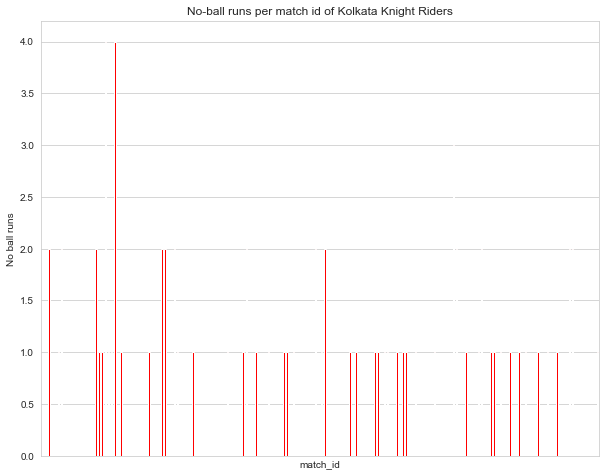

In [101]:
plt.figure(figsize=(10,8))
delivery[delivery['bowling_team']==team_1].groupby('match_id').sum()['noball_runs'].plot(kind='bar', color='red')
plt.xticks([])
plt.ylabel("No ball runs")
plt.title("No-ball runs per match id of {}".format(team_1))

Text(0.5, 1.0, 'No-ball runs per match id of Royal Challengers Bangalore')

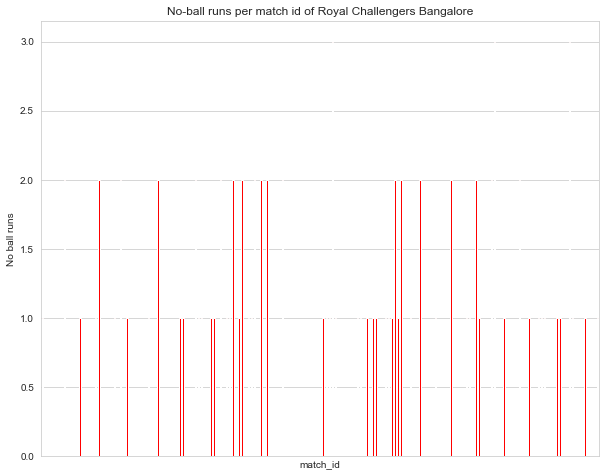

In [102]:
plt.figure(figsize=(10,8))
delivery[delivery['bowling_team']==team_2].groupby('match_id').sum()['noball_runs'].plot(kind='bar', color='red')
plt.xticks([])
plt.ylabel("No ball runs")
plt.title("No-ball runs per match id of {}".format(team_2))

In [107]:
kkr_bowl = delivery[delivery['bowling_team']==team_1]
kkr_bowl

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
495,3,1,Gujarat Lions,Kolkata Knight Riders,1,1,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
496,3,1,Gujarat Lions,Kolkata Knight Riders,1,2,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
497,3,1,Gujarat Lions,Kolkata Knight Riders,1,3,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
498,3,1,Gujarat Lions,Kolkata Knight Riders,1,4,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
499,3,1,Gujarat Lions,Kolkata Knight Riders,1,5,JJ Roy,BB McCullum,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178097,11347,2,Mumbai Indians,Kolkata Knight Riders,16,3,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178098,11347,2,Mumbai Indians,Kolkata Knight Riders,16,4,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
178099,11347,2,Mumbai Indians,Kolkata Knight Riders,16,5,RG Sharma,AS Yadav,P Krishna,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178100,11347,2,Mumbai Indians,Kolkata Knight Riders,16,6,AS Yadav,RG Sharma,P Krishna,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


([], <a list of 0 Text xticklabel objects>)

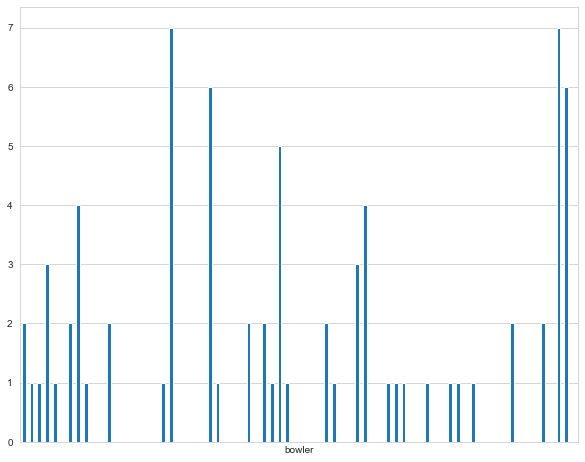

In [124]:
plt.figure(figsize=(10,8))
kkr_bowl.groupby('bowler').sum()['noball_runs'].plot(kind='bar')
plt.xticks([])